# 中文斷詞
* 中文的「字詞」是獨立的意義單元，在閱讀時，讀者通常會下意識地先斷詞，再理解原意。
* 如果斷錯詞，語意將難以理解。進行文字探勘時，通常要先斷詞，斷詞的正確與否會影響其後的分析。
* 本週，我們介紹一個簡便的斷詞模組：結巴(Jieba)。它最大的好處是簡單易用，而且可以自己新增詞彙，校正錯誤。
* 不過即使如此，我們還是無保證斷詞完全正確，因為中文實在太複雜了。

## 結巴斷詞

* 官方網頁   https://github.com/fxsjy/jieba
* 使用前要先安裝, 在命令提示字元
* pip install jieba,  easy_install jieba  或者 pip3 install jieba 
* 半自動安裝：先下載 http://pypi.python.org/pypi/jieba/ ，解壓縮後 python setup.py install 
* 手動安裝：將 jieba 目錄放置於當前目錄，或者 site-packages 目錄 (C:\Users\user\Anaconda3\Lib\site-packages)

In [1]:
import jieba
import re

In [2]:
path="D:/My Python/"

In [3]:
import pandas as pd
df =pd.read_excel(path+"_PTT/gassip_token7000.xlsx", 0)
df

,no,name,title,date,month,year,push,trash,token
0,390001,MatheFuck (媽英告),Gossiping,43658,Jul,2019,12,2,學校 採收 馬鈴薯 … 日 13 學童 集體 食物中毒 不只 發芽 「 未成熟 也 有毒 」...
1,390002,zxcxxx (進擊?暖男),Gossiping,43658,Jul,2019,14,4,韓國 家暴 男 被 逮竟 狡辯 「 其他 男人 也 一樣 」 奇摩 華視 2019 年 7 ...
2,390003,hebeshaman (Hebe),Gossiping,43658,Jul,2019,14,4,那天 路上 看到 有 foodpanda 的 外 送員 我問 了 一下 他 是 兼職 還 正...
3,390004,AikawaJyun (死色真紅),Gossiping,43658,Jul,2019,7,1,其實 很 簡單 啊 因為 瑞士 風景如畫 更 漂亮 人民 素質 又 因為 有 日耳曼 自治 ...
4,390005,Twatch (code),Gossiping,43658,Jul,2019,37,5,各位 魯蛇 我 是 東 莒 2199T 砲 兵 有沒有 學長 有 的話 喊一聲 在 安安 順...
5,390006,KplayBlog (Kplay-喜劇演員),Gossiping,43658,Jul,2019,3,0,柯文哲 自己 也 覺得 韓國 瑜 好 打 所以 柯文哲 現在 的 主要 敵人 是 蔡英文 啊...
6,390007,SixLine (GG >2SD),Gossiping,43658,Jul,2019,3,3,米娜 桑空 幫哇 胎嘎後是 這樣 的 最近 在 看 黑 又 屎 廚房 嘛 大家 都 知道 白...
7,390008,WiserWilly (打你屁鼓手),Gossiping,43658,Jul,2019,6,3,乾 拎 老師 耐 德利 我 上網 買 了 個 杯子 下面 居然 沒寫 這是 幾號 塑膠 我問...
8,390009,zalora (lara),Gossiping,43658,Jul,2019,14,4,我 發現 垃圾 五毛 跟 黨工 帶 風向 的 模式 是 先發 一個 政問 文引 戰裡面 是 ...
9,390010,mother (老木),Gossiping,43658,Jul,2019,2,0,YA ! 老闆 不來 ! 摸魚 啦 ! 好吃 的 蘇喜 再 爭鮮 種類 豐富 新鮮 的 滋味...


In [4]:
# 刪除無值的紀錄
df.token.isnull().value_counts()
df.token=df.token.fillna(999)
delete=df[df.token==999].index.tolist()
print (len(delete))
df=df.drop(delete)
df.index=range(len(df))

1


In [5]:
# 刪除非字串
delete=[]
for n in range(len(df)):
    try:
        if (type(df.token[n])!= str) or (len(df.token)<1):
            delete.append(n)
    except:
        delete.append(n)
print (len(delete))     
df=df.drop(delete)
df.index=range(len(df))

1


# 刪除數字與英文

In [6]:
# list 分詞校正，去除特殊符號，視需要調整。
new_token=[]
for n in range(len(df)):
    seg_list =df.token[n].split()
    # 去除空白
    seg_list = [i for i in seg_list if i != u''] #如果不是XX就將它放進去
    # 去除數字
    seg_list = [w for w in seg_list if not re.search(r"[0123456789]",w)]
    # 去除英文
    seg_list = [w for w in seg_list if not re.search(r"[a-zA-Z]",w)]
    # 去除特殊符號
    seg_list = [w for w in seg_list if not re.search(r'[-，+、@,？{}●►❖★！!：/(=)…（）『』%《》$;；」:?=<>"／.&#"「_【】]',w)]
    # 去除特殊字串
    deletewords=['[',']',"'",'\ufeff']
    seg_list = [w for w in seg_list if w not in deletewords]
    seg=" ".join(seg_list)
    new_token.append(seg)

In [7]:
new_token[0]

'學校 採收 馬鈴薯 日 學童 集體 食物中毒 不只 發芽 未成熟 也 有毒 媒體 來源 東森 新聞 雲 記者 署名 林瑩 真 完整 新聞標題 完整 新聞 內文 日本 兵庫縣 寶塚市 一間 小學 發生 集體 食物中毒 事件 名 學童 食用 在 校內 種植 的 馬鈴薯 後 發生 食物中毒 緊急 送醫 。 一般 已知 發芽 的 馬鈴薯 有毒 不可 食用 事實上 未成熟 的 馬鈴薯 也 有毒 。 綜合 日媒 報導 日 中午 過後 寶塚市 美座 小學 有 名 學童 身體 不適 有 嘔吐 腹痛 等 症狀 醫生 檢查 後 確定 是 食物中毒 。 學童 中毒 原因 則是 當日 早上 進行 了 挖出 校園 中 種植 的 馬鈴薯 煮成 料理 的 實習課 懷疑 校園 中 種植 的 馬鈴薯 尚未 成熟 。 報導 指出 日本 學校 有 許多 培養 孩子 自己 種植 採收 的 實習 課程 這次 就是 採收 在 春天 種下 的 馬鈴薯 然而 學校 種植 的 馬鈴薯 不如 農夫 栽培 的 可能 沒有 完全 發育 就 採收 因此 食用 恐有 中毒 風險 。 不過 新聞 曝光 後 許多 網友 驚呼 不 知道 未成熟 的 馬鈴薯 也 有毒 一般 不是 發芽 才 有毒 嗎 。 報導 指出 除了 發芽 的 部分 不能 食用 以外 若 燈光 照 下 發現 馬鈴薯 表皮 呈現 綠色 也 是 不能 食用 若 一顆 馬鈴薯 有 至 個 芽眼 又 難以 判斷 要 剔除 多 大部分 才能 避開 發芽 的 中毒 部位 最好 整顆 丟棄 。 事實上 日本 厚生 勞動 省 數據 顯示 近 年 有 人 是 因未 食用 中毒 植物 而 死亡 出現 嘔吐 拉肚子 等 中毒 症狀 的則 多達 人 更 令人 驚訝 的 是 最常 被 吃 到 的 有毒 植物 就是 馬鈴薯 是 遙遙領先 的 第一名 。 備註 敗選 後 滿滿的 感謝 ~ 感謝 感謝 再 感謝 ~ 謙卑 謙卑 再 謙卑 ~'

In [9]:
df.token=new_token
print (len(df.token))


7381


# 請增加自定字典，増加斷詞成功率

In [10]:
from __future__ import print_function
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re

# 潛在語意
* 字詞在不同向度上的投影，依投影值大小排序，大者歸為一類，代表這個向度是由這些字詞所構成。
* 字詞-文章矩陣(tdm)，SVD降維
* CountVectorizer() 文章字詞矩陣 DTM 無加權
* TfidfVectorizer() 文章字詞矩陣 DTM 有加權
* 都做一遍，同學可比較其差異

In [11]:
docs=list(df.token)
docs[0]

'學校 採收 馬鈴薯 日 學童 集體 食物中毒 不只 發芽 未成熟 也 有毒 媒體 來源 東森 新聞 雲 記者 署名 林瑩 真 完整 新聞標題 完整 新聞 內文 日本 兵庫縣 寶塚市 一間 小學 發生 集體 食物中毒 事件 名 學童 食用 在 校內 種植 的 馬鈴薯 後 發生 食物中毒 緊急 送醫 。 一般 已知 發芽 的 馬鈴薯 有毒 不可 食用 事實上 未成熟 的 馬鈴薯 也 有毒 。 綜合 日媒 報導 日 中午 過後 寶塚市 美座 小學 有 名 學童 身體 不適 有 嘔吐 腹痛 等 症狀 醫生 檢查 後 確定 是 食物中毒 。 學童 中毒 原因 則是 當日 早上 進行 了 挖出 校園 中 種植 的 馬鈴薯 煮成 料理 的 實習課 懷疑 校園 中 種植 的 馬鈴薯 尚未 成熟 。 報導 指出 日本 學校 有 許多 培養 孩子 自己 種植 採收 的 實習 課程 這次 就是 採收 在 春天 種下 的 馬鈴薯 然而 學校 種植 的 馬鈴薯 不如 農夫 栽培 的 可能 沒有 完全 發育 就 採收 因此 食用 恐有 中毒 風險 。 不過 新聞 曝光 後 許多 網友 驚呼 不 知道 未成熟 的 馬鈴薯 也 有毒 一般 不是 發芽 才 有毒 嗎 。 報導 指出 除了 發芽 的 部分 不能 食用 以外 若 燈光 照 下 發現 馬鈴薯 表皮 呈現 綠色 也 是 不能 食用 若 一顆 馬鈴薯 有 至 個 芽眼 又 難以 判斷 要 剔除 多 大部分 才能 避開 發芽 的 中毒 部位 最好 整顆 丟棄 。 事實上 日本 厚生 勞動 省 數據 顯示 近 年 有 人 是 因未 食用 中毒 植物 而 死亡 出現 嘔吐 拉肚子 等 中毒 症狀 的則 多達 人 更 令人 驚訝 的 是 最常 被 吃 到 的 有毒 植物 就是 馬鈴薯 是 遙遙領先 的 第一名 。 備註 敗選 後 滿滿的 感謝 ~ 感謝 感謝 再 感謝 ~ 謙卑 謙卑 再 謙卑 ~'

In [12]:
# documents 為 list 元素為 string
num_i=500    # number of concepts
num_t=10    # number of items shown

# 文章字詞矩陣，沒有加權 ****注意單辭被排除在外
#vectorizer = CountVectorizer(min_df = 1,ngram_range= (1,1))  
#count = vectorizer.fit_transform(docs) 

# 或者 tfidf 加權 ****注意單辭被排除在外
vectorizer2 = TfidfVectorizer(min_df = 1,ngram_range= (1,1) )  
tfidf = vectorizer2.fit_transform(docs) 

# 字詞文章矩陣，轉置 **** 注意先轉置
#tdm_count=count.transpose() 
tdm_tfidf=tfidf.transpose() 

# SVD 降維以後的結果 
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object    

# 各字詞在各維度上的投影，亦即將字詞變成向量  #前面是將文章變成向量，這裡是將字詞變成向量
#將文章降成500個維度，類似將文章分類成500個主題的概念
# lsa_count = svd.fit_transform(tdm_count)  # numpy array  
lsa_tfidf = svd.fit_transform(tdm_tfidf)  # numpy array  

# 標準化
# lsa_count_n = Normalizer(copy=False).fit_transform(lsa_count)   
lsa_tfidf_n = Normalizer(copy=False).fit_transform(lsa_tfidf)   

# 字詞的 list
terms=vectorizer2.get_feature_names()   

# 降維後所能解釋的變異
v1=svd.explained_variance_
v2=svd.explained_variance_ratio_
v3=svd.explained_variance_ratio_.sum()
print ('能解釋的變異',v1)
print ('能解釋的變異%',v2)
print ('能解釋的變異%總和',v3)

能解釋的變異 [1.16723523e-03 4.75572383e-04 3.12127518e-04 3.02593366e-04
 2.20022962e-04 1.98689139e-04 1.79846398e-04 1.63185025e-04
 1.57514152e-04 1.49064461e-04 1.46039897e-04 1.43874669e-04
 1.42856507e-04 1.39792776e-04 1.37269834e-04 1.36289103e-04
 1.34949016e-04 1.30375019e-04 1.28526742e-04 1.25747287e-04
 1.22308961e-04 1.20506586e-04 1.18270618e-04 1.16932891e-04
 1.15844801e-04 1.12715161e-04 1.12322464e-04 1.10461380e-04
 1.09431835e-04 1.08930332e-04 1.08005368e-04 1.07739457e-04
 1.05024022e-04 1.04129170e-04 1.03077042e-04 1.02114031e-04
 1.00676579e-04 1.00295769e-04 9.93750995e-05 9.86289448e-05
 9.78482741e-05 9.56732767e-05 9.51455557e-05 9.47430151e-05
 9.41155265e-05 9.36413337e-05 9.19217549e-05 9.15230365e-05
 9.12210941e-05 9.04561718e-05 8.98293188e-05 8.93057676e-05
 8.89002688e-05 8.80555769e-05 8.77166242e-05 8.70228945e-05
 8.67657816e-05 8.61300401e-05 8.56372188e-05 8.54116503e-05
 8.42952190e-05 8.37964530e-05 8.34791382e-05 8.30714832e-05
 8.25998513e-05 8

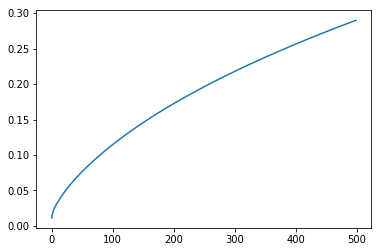

In [13]:
y=[]
cum=0
for v in range(len(v1)):
    cum=cum+v2[v]
    y.append(cum)
y=np.array(y)
plt.plot(y[0:num_i])
plt.show()

#各個維度可以解釋的累計變異

In [14]:
# 所有的字詞
len(terms)
print (terms[0:100])

['一一', '一一分', '一丁點', '一三五', '一上', '一上午', '一上戲', '一上臺', '一下', '一下下', '一下子', '一下眼', '一不做', '一不小心', '一不注意', '一世', '一中', '一中原則', '一中各表', '一串', '一九九', '一九九三', '一九九三年', '一九九五年', '一九九六年', '一九六八年', '一乾二淨', '一亂板', '一了百了', '一事', '一二', '一二三', '一二十個', '一二十年', '一二十萬', '一二名', '一二年', '一些', '一人', '一人份', '一人全', '一人出', '一人得道', '一人救', '一人發', '一人苦', '一人難', '一介', '一介武夫', '一仗', '一付', '一仟六佰', '一代', '一代人', '一代宗師', '一以概', '一以貫之', '一件', '一任', '一份', '一休', '一估', '一伴', '一伸', '一位', '一作', '一作作', '一併', '一來', '一來一往', '一例', '一例一休', '一保', '一信', '一個', '一個一歲', '一個三十', '一個中國', '一個五十多歲', '一個個', '一個半', '一個半月', '一個名', '一個多', '一個多元', '一個多月', '一個天', '一個家', '一個巴掌拍不響', '一個打', '一個排', '一個月', '一個樣', '一個班', '一個碗', '一個箭步', '一個願打', '一個願挨', '一個點', '一倍']


In [15]:
def lsa_concept(model_lsa, terms, num_t, num_i):    
    final=[]
    for i, comp in enumerate(model_lsa.T):
        termsInComp=zip(terms,comp)
        # 依重要性 x[1] 排序，取前 num_t名，找尋在每個向度，投影值最大者
        sortedTerms=sorted(termsInComp, key=lambda x: x[1],reverse=True)[:num_t]
        sub_final=[]
        for term in sortedTerms:
             sub_final.append(term[0]+'('+str(round(term[1],2))+')')
        final.append(sub_final)     

    # final 轉置
    final = [[final[j][i] for j in range(len(final))] for i in range(len(final[0]))]
    
    # 概念構成表 
    s = pd.DataFrame(final, index=range(num_t), columns=range(num_i))
    return s

In [16]:
# lsa_tfidf 各字詞在 num_i 個主題空間上的投影 
print ("字詞數", len(lsa_tfidf))
print ("字詞", terms[0])
print ("字詞投影", lsa_tfidf[0])

字詞數 71595
字詞 一一
字詞投影 [ 9.09364660e-02  4.31113229e-02 -5.02470394e-02 -8.29066798e-03
  8.76607451e-03 -6.24173064e-02 -1.44951135e-02  3.21363541e-02
  4.03030224e-03  2.43979812e-02 -1.30941847e-02  3.75066358e-03
  5.95952409e-03  3.52784822e-02 -4.00022486e-02  1.70571580e-02
 -8.53287022e-03  3.46340667e-02 -2.61072683e-02 -1.79517353e-02
 -1.35889038e-02  4.08590027e-03 -5.62605367e-03 -4.03058779e-02
  2.31814738e-03 -6.93018614e-03 -2.15953177e-02  6.18254864e-03
 -4.32862475e-02 -1.37717954e-02  4.50590480e-03 -2.13717601e-02
 -1.45923068e-02 -2.81297582e-02 -4.42133001e-02 -3.97601185e-02
 -4.56145953e-02  3.60591477e-02  4.86428341e-02  3.14153544e-02
  1.62277100e-02  5.91107466e-03  4.44557437e-02 -6.03201730e-03
  4.14376096e-02  1.61301989e-02 -4.35649105e-02  3.12223951e-02
 -1.13849825e-02 -1.75981931e-02  3.96877093e-02 -6.27732302e-02
 -1.30312292e-02  1.25478164e-02  1.87381852e-02 -6.42207477e-04
 -2.77782548e-02  2.58759176e-02  1.56823737e-02  2.68258697e-03
 -1.

In [17]:
# lsa_tfidf,num_i 個維度，主要構成的字詞 
num_t=20
df=lsa_concept(lsa_tfidf, terms, num_t,num_i)
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,就是(0.51),韓國(0.6),臺灣(0.52),民進黨(0.7),八卦(0.54),臺灣(0.32),日本(0.59),日本(0.48),肥宅(0.65),什麼(0.38),...,做超(0.22),也給(0.22),狂是(0.21),含水量(0.35),經濟區(0.27),大麻(0.2),區裡面(0.25),說五樓(0.2),企及(0.23),全聯全(0.26)
1,什麼(0.47),勝出(0.6),中國(0.42),林飛帆(0.64),有沒有(0.51),荷蘭人(0.31),吉田凜音(0.41),柯文哲(0.43),病入膏肓(0.52),煩惱(0.29),...,健行(0.22),對壘(0.22),木製(0.2),恆溫(0.35),彈道(0.27),出某(0.19),喊貴(0.25),過五樓(0.2),靜得(0.23),事百祥會(0.23)
2,臺灣(0.47),前鴻海(0.53),美國(0.4),接任(0.6),接任(0.31),垮過(0.3),女歌手(0.41),在世界上(0.37),自寞(0.52),郭柯配(0.27),...,商大夜(0.22),掐指一算(0.22),航路(0.19),甘露(0.35),巡弋(0.27),網軍來(0.19),三是(0.23),含水量(0.19),高中生(0.23),扇子(0.23)
3,可以(0.46),贏得(0.53),上具(0.37),學運領袖(0.59),日人(0.29),沒垮(0.3),哈韓(0.41),只嘆(0.35),搓揉(0.5),下周一(0.27),...,技術員(0.22),一梯(0.2),億則(0.19),紅柴(0.35),什么(0.26),網軍讓(0.19),社區(0.22),恆溫(0.19),撞死(0.21),熊想(0.23)
4,沒有(0.45),總統大選(0.52),入閣(0.37),徐佳青(0.56),布後就(0.29),或經(0.23),大島(0.41),可向(0.35),紙板(0.5),追問(0.27),...,欣興(0.22),是澤北榮治(0.2),光榮感(0.19),花蜜(0.35),介質(0.26),網軍連(0.19),民生(0.22),甘露(0.19),選有(0.21),熊的頭(0.23)
5,不是(0.44),國民黨(0.5),制訂(0.37),失望透頂(0.56),肥宅(0.29),托管(0.23),很愛跑(0.41),多事(0.35),四賤客(0.49),工作(0.27),...,優生(0.21),訓練營(0.2),功勳(0.19),不流(0.35),側滑(0.26),跑入(0.19),飽受(0.22),紅柴(0.19),數一數二(0.21),熊熊(0.2)
6,自己(0.44),揭曉(0.49),嗆將(0.37),余天(0.55),徐佳青(0.29),盟軍(0.23),權志龍(0.41),已來(0.35),說破(0.49),只嘆(0.26),...,可買當(0.21),試煉(0.2),大堆(0.19),丟進養(0.35),側窗(0.26),優良傳統(0.19),千杯(0.21),花蜜(0.19),小威則(0.2),福利(0.2)
7,至於(0.44),總統(0.49),圖文並茂(0.37),淵源(0.55),林飛帆(0.28),訂立(0.23),涼介(0.41),柯兩人(0.35),說間(0.49),可向(0.26),...,清淨機(0.21),新人(0.2),幹活(0.19),九陽(0.35),側部(0.26),抽個(0.19),俄方(0.21),不流(0.19),男網(0.2),美聯社(0.19)
8,一個(0.43),選民(0.48),平潭島(0.37),羅文(0.54),學運領袖(0.28),吉田凜音(0.22),玲奈(0.41),開幕會(0.35),媽寶(0.46),多事(0.26),...,特典(0.21),選秀(0.19),批盧(0.19),乳酪(0.35),全封閉(0.26),藥在(0.19),下達(0.21),丟進養(0.19),贏小威(0.2),壓到(0.19)
9,真的(0.42),黨內(0.48),懷有(0.37),日人(0.53),失望透頂(0.27),女歌手(0.22),田麻(0.41),則說(0.35),肥宅界(0.46),已來(0.26),...,萬送(0.21),超兇(0.19),日怒批(0.19),佐紅柴(0.35),兵工(0.26),吸食(0.19),了汰換(0.21),九陽(0.19),越前(0.2),拍個(0.19)


# select features
* 依tfidf 篩選 select features
* 簡化各篇文章，只取分數較高的 features
* 可節省記憶體

In [18]:
# 篩選字詞，tfidf > crit 者 視需要而定
doc3=[]
for t in tfidf:
    a=t.toarray()
    term=[]    
    n=-1
    for v in a[0]:
        n+=1      
        if v>0.1:           
            term.append(terms[n])
    string=' '.join(term)        
    doc3.append(string)

In [19]:
# select features 與原始文字 比較
print (docs[1])
print ("********")
print (doc3[1])

韓國 家暴 男 被 逮竟 狡辯 其他 男人 也 一樣 奇摩 華視 年 月 日 韓國 李蘇竣 綜合 報導 日前 網路上 盛傳 一段 影片 一名 韓國 男子 對 自己 妻子 家暴 不顧 親生 兒子 就 在 一旁 狠 狠將 妻子 往死裡 打 。 影片 流出 後 引來 各界 關注 男子 也 隨即 遭到 警方 逮捕 沒想到 這名 男子 卻 用 各種 理由 合理化 自己 的 行為 還 一度 表示 男人 都 會 這樣 。 南韓 全羅 南道 靈岩 郡 的 一名 男子 因 不滿 越南籍 的 妻子 煮 的 料理 不 合胃口 竟 痛毆 妻子 該 家暴 男子 還 不顧 歲 的 兒子 就 在 一旁 將 妻子 打 到 全身 癱軟 瑟縮 在 牆角 求饒 小孩 則是 一邊 大哭 一邊 想 阻止 父親 的 暴力 行為 。 綜合 韓國 媒體 報導 男子 在 影片 發布 後 隨即 遭到 逮捕 妻小 也 被 社會福利 機構 安置 。 男子 在 被 逮捕 後 向 警方 宣稱 由於 與 妻子 的 語言文化 隔閡 過大 長期 不能 理解 對方 的 語言 對 他 造成 了 生活 上 的 影響 更 辯解 因為 這些 困擾 才 會 導致 家暴 他 還說 其他 男人 也 都 會 這樣 企圖 合理化 自己 的 行為 希望 外界 不要 過度 批判 他 。 發現 或是 遭受 家庭暴力 時 請 勇敢 尋求 幫助 。 華視 關心 你 請撥 打 全國 婦幼 保護 專線
********
一旁 一邊 不顧 兒子 合理化 妻子 家暴 影片 男人 男子 華視 行為 逮捕 遭到 隨即 韓國


# 再做一次降維

In [20]:
# documents 為 list 元素為 string
num_i=300    # number of concepts
num_t=10    # number of items shown

# tfidf 加權 ****注意單辭被排除在外
vectorizer2 = TfidfVectorizer(min_df = 1,ngram_range= (1,1) )  
tfidf2 = vectorizer2.fit_transform(doc3) 

# 字詞文章矩陣，轉置 **** 注意先轉置
tdm_tfidf2=tfidf2.transpose() 

# SVD 降維以後的結果 
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object    

# 各字詞在各維度上的投影，亦即將字詞變成向量
lsa_tfidf = svd.fit_transform(tdm_tfidf2)  # numpy array  

# 標準化
lsa_tfidf_n = Normalizer(copy=False).fit_transform(lsa_tfidf)   

# 字詞的 list
terms=vectorizer2.get_feature_names()   

# 降維後所能解釋的變異
v1=svd.explained_variance_
v2=svd.explained_variance_ratio_
v3=svd.explained_variance_ratio_.sum()
print ('能解釋的變異',v1)
print ('能解釋的變異%',v2)
print ('能解釋的變異%總和',v3)

能解釋的變異 [5.47388959e-04 3.21717372e-04 2.19177165e-04 2.09693469e-04
 1.98644375e-04 1.94167106e-04 1.64757358e-04 1.60294668e-04
 1.52391674e-04 1.48067942e-04 1.44584703e-04 1.38865899e-04
 1.38368668e-04 1.36608533e-04 1.35338067e-04 1.33868229e-04
 1.31908098e-04 1.31277468e-04 1.28045685e-04 1.27396074e-04
 1.26295236e-04 1.24738664e-04 1.23402965e-04 1.23146569e-04
 1.21696125e-04 1.20792524e-04 1.19783265e-04 1.18346017e-04
 1.17431901e-04 1.17203857e-04 1.16526082e-04 1.16280659e-04
 1.14976355e-04 1.14709540e-04 1.14041599e-04 1.13695772e-04
 1.12990145e-04 1.12579973e-04 1.11432469e-04 1.10321524e-04
 1.09941445e-04 1.09551547e-04 1.08644149e-04 1.08697310e-04
 1.08134012e-04 1.07300978e-04 1.07063910e-04 1.06725099e-04
 1.06261478e-04 1.05825936e-04 1.04946274e-04 1.04272913e-04
 1.03955275e-04 1.03877080e-04 1.03034599e-04 1.02831791e-04
 1.02484091e-04 1.02330664e-04 1.01829282e-04 1.01795730e-04
 1.01371714e-04 1.01034841e-04 9.98295573e-05 9.99256767e-05
 9.92694041e-05 9

# 潛在語意
* 關聯性最強的幾個詞

In [21]:
import numpy as np
def cos_simility(a, b):
    # list 改 array
    x = np.array(a)
    y = np.array(b)
    # 向量長度
    Lx=np.linalg.norm(x)
    Ly=np.linalg.norm(y)
    # cos 值
    cos=round(x.dot(y)/(Lx*Ly),8)
    return cos

def kClosestTerms(k,kw,vectorizer,term_proj): 
    # term序號，例如 "吃飯" 的序號 = 7
    index = vectorizer.vocabulary_[kw]       
    terms=vectorizer.get_feature_names()   
    closestTerms = {}
    for i in range(len(terms)):
        if terms[i]!=kw:        
            closestTerms[terms[i]] = cos_simility(term_proj[index],term_proj[i])

    # 依 dictionary 的 value (即相似性) 排序
    sortedList = sorted(closestTerms , key= lambda l : closestTerms[l])

    # 取前 k個，字詞及相似性
    lis_sorted =sortedList[::-1][0:k]
    lis_sim=[]
    for l in lis_sorted:
        lis_sim.append(closestTerms[l])        

    data=list(zip(lis_sorted, lis_sim))   
    df=pd.DataFrame(data)      
    return df

In [26]:
kClosestTerms(100,"香港",vectorizer2,lsa_tfidf_n)

#潛在語意: 香港與反送中構成一個'潛在語意'的概念

,0,1
0,反送,0.914023
1,沙田區,0.880109
2,遊行,0.875325
3,水貨,0.874437
4,藥妝店,0.874127
5,搶購,0.874127
6,中客,0.874127
7,酷熱,0.872987
8,解渴,0.872987
9,補給線,0.872987


# 作業:  
本週我們進行多文本的分析，重點放在文章的潛在語意。字詞在各篇文章出現的頻率，構成字詞矩陣。經過降維，可以抽離出一些概念，這些概念由一組字詞所構成，各字詞的貢獻度不一。此即潛在語意分析或稱topic models。各篇文章在概念所構成的空間的投影，可作為文章分類的依靠。
本週介紹 LSI 亦稱潛在語意分析。請記住電腦是依人的指令來工作的，因此研究者的創意永遠是最重要的。
本週作業：以你們的文本進行分析!兩個重點，是否可以找到一些概念？最接近的字詞？


In [ ]:
#文章的潛在語意
#字詞出現在文章中的頻率構成字詞矩陣→概念

In [ ]:
#是否可以找到一些概念? 最接近的字詞? 

In [ ]:
#將PTT錯字增補200個字詞(any) userdict